# Geopandas 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy

In [2]:
# Cargar el mapa
mapa = gpd.read_file('data/provincias.geojson')
mapa.head(10)

,NAME_1,NAME_2,CC_2,geometry
0,Andalucía,Almería,04,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,Andalucía,Córdoba,14,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,Andalucía,Granada,18,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,21,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."
5,Andalucía,Jaén,23,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37..."
6,Andalucía,Málaga,29,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36..."
7,Andalucía,Sevilla,41,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36..."
8,Aragón,Huesca,22,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4..."
9,Aragón,Teruel,44,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7..."


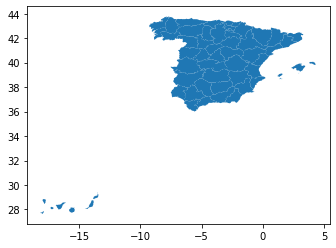

In [3]:
mapa.plot()

In [4]:
natalidad = pd.read_csv('data/natalidad.csv')
natalidad.head()

,NAME,NATALIDAD
0,Almería,10.48
1,Cádiz,8.11
2,Córdoba,7.90
3,Granada,7.78
4,Huelva,7.57


In [5]:
mapa_data = pd.merge(mapa, natalidad, left_on='NAME_2', right_on='NAME')
mapa_data.head()

,NAME_1,NAME_2,CC_2,geometry,NAME,NATALIDAD
0,Andalucía,Almería,04,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",Almería,10.48
1,Andalucía,Cádiz,11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",Cádiz,8.11
2,Andalucía,Córdoba,14,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",Córdoba,7.90
3,Andalucía,Granada,18,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",Granada,7.78
4,Andalucía,Huelva,21,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",Huelva,7.57


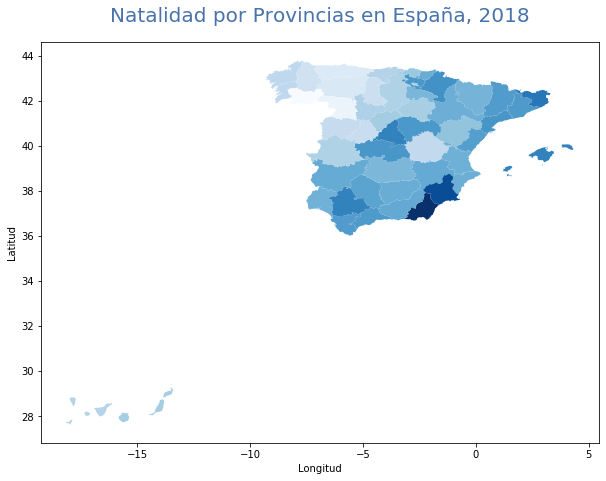

In [6]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Natalidad por Provincias en España, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
mapa_data.plot(column='NATALIDAD', cmap='Blues', ax=ax, zorder=5)

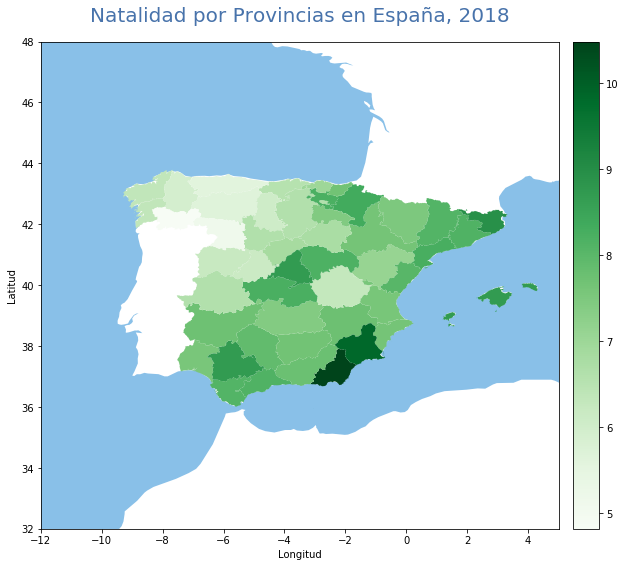

In [7]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Natalidad por Provincias en España, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
mapa_data.plot(column='NATALIDAD', cmap='Greens', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "data/ne_50m_ocean.shp"
map_oceanos = gpd.read_file(oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

# Cartopy

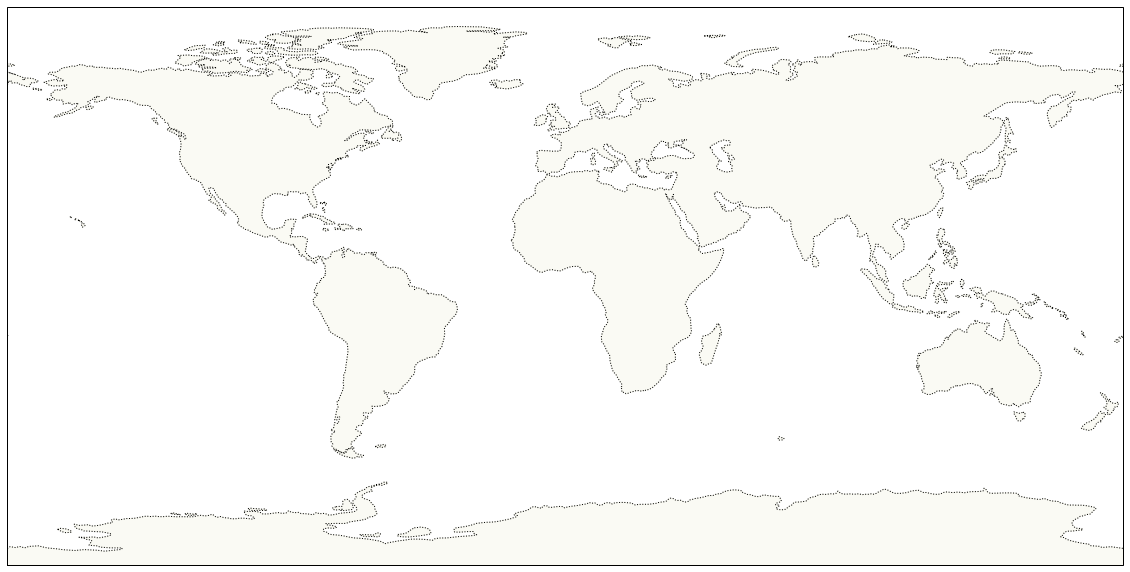

In [8]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, alpha=0.3 )
ax.add_feature(cartopy.feature.COASTLINE, linestyle=':')

#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
#ax.add_feature(cartopy.feature.RIVERS)

plt.show()

In [9]:
data = pd.read_csv('data/TweetSurfData.csv', sep=";")


In [10]:
data.head()

,homelon,homelat,homecontinent,n
0,-178.12,-14.29,Australia,10
1,-172.10,-13.76,NaN,2
2,-159.72,21.97,NaN,6
3,-159.59,21.91,North America,4
4,-159.53,22.10,North America,37


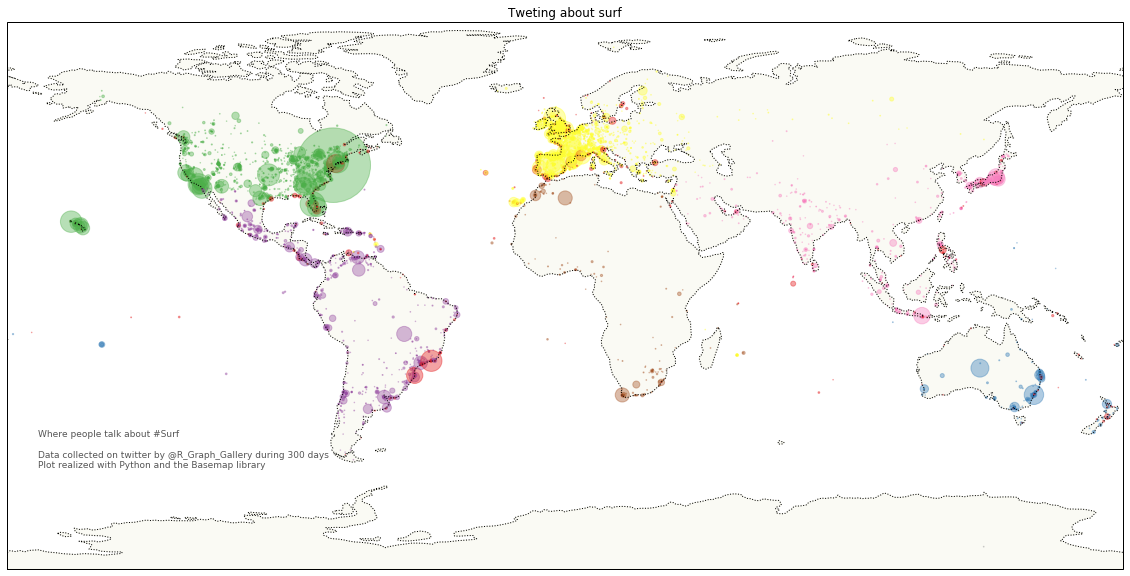

In [11]:

plt.figure(figsize=(20,20))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND, alpha=0.3 )
ax.add_feature(cartopy.feature.COASTLINE, linestyle=':')

# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
plt.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
 
# copyright and source data info
plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
#ax.set_extent([-12, 5, 32, 48])

plt.title('Tweting about surf')
plt.show()


In [12]:
municipios = pd.read_csv('data/municipios.csv')

In [13]:
municipios.head()

,Comunidad,Provincia,Población,Latitud,Longitud,Altitud,Habitantes,Hombres,Mujeres,Capital
0,Andalucía,Almería,Abla,"37,14114","-2,780104","871,1684",1504,783,721,No
1,Andalucía,Almería,Abrucena,"37,13305","-2,797098","976,9387",1341,682,659,No
2,Andalucía,Almería,Adra,"36,74807","-3,022522","10,97898",24373,12338,12035,No
3,Andalucía,Almería,Albánchez,"37,2871","-2,181163","481,3123",815,422,393,No
4,Andalucía,Almería,Alboloduy,"37,03319","-2,62175","388,4346",674,334,340,No


In [21]:
municipios.Longitud = municipios.Longitud.str.replace(',','.').astype(float)

In [22]:
municipios.Latitud = municipios.Latitud.str.replace(',','.').astype(float)

In [23]:
capitales = municipios.get(municipios.Capital=='Si')

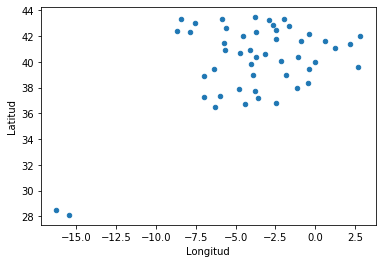

In [24]:
capitales.plot.scatter('Longitud', 'Latitud')

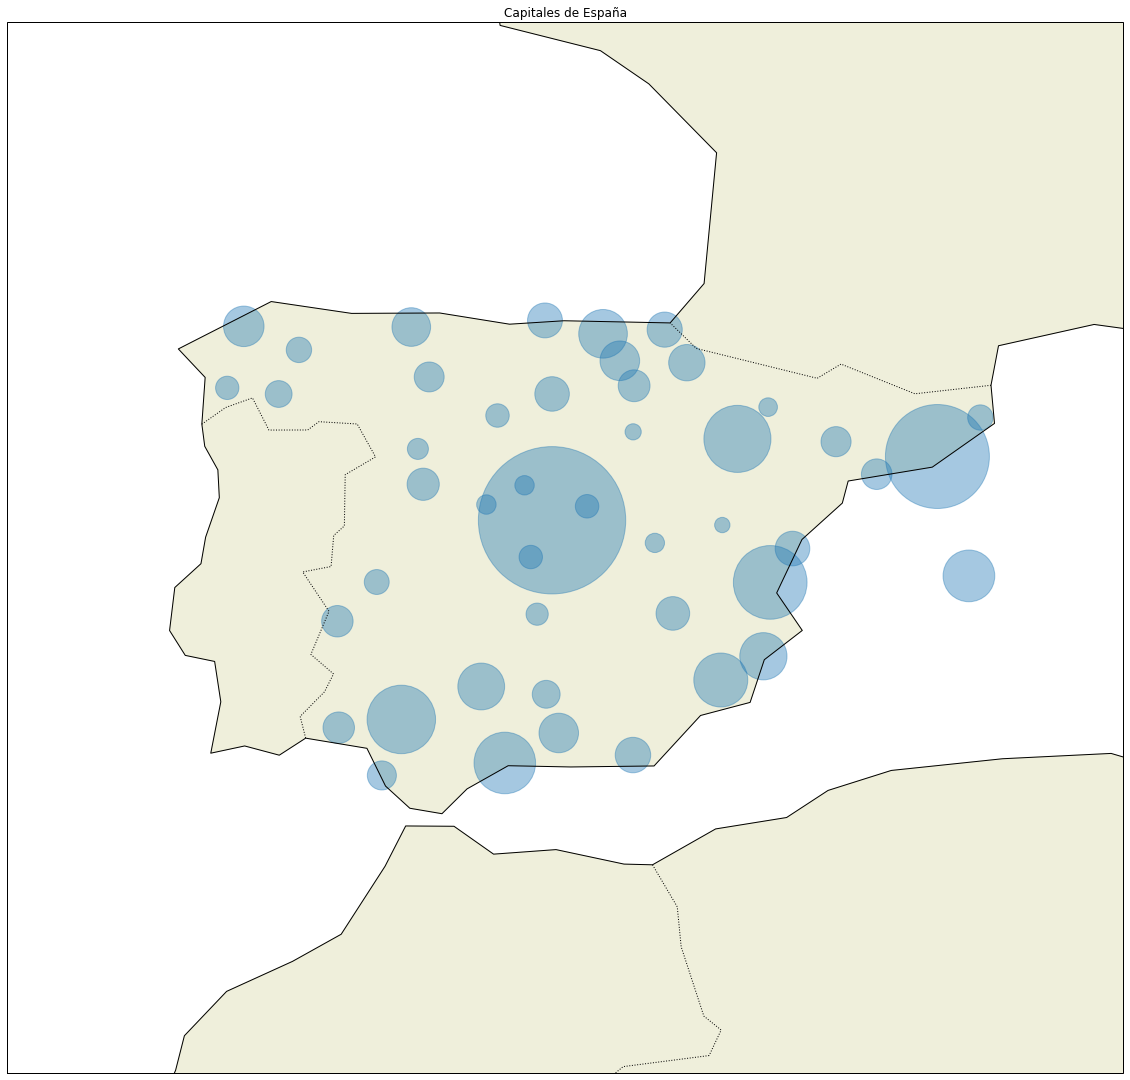

In [25]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE)

ax.set_extent([-12, 5, 32, 48])

plt.scatter(capitales.Longitud, capitales.Latitud, s=capitales.Habitantes/150, alpha=0.4)
plt.title('Capitales de España')
plt.show()